# 线性神经网络

### 我们将介绍神经网络的整个训练过程，包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型
### 我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识

## 3.1 线性回归

#### 回归是为单个或多个因变量和自变量之间关系建模的一类方法
#### 在一些科学领域，回归经常用来表示输入和输出之间的关系

#### 在机器学习领域中的大多数任务通常都与预测（prediction）有关
#### 但不是所有预测都是回归问题

### 3.1.1 线性回归的基本元素

#### 线性回归（linear regression）可以追溯到19世纪初，它在回归的各种标准工具中最简单而且最流行

#### 线性回归基于几个基本的假设：
#### 1. 首先，假设自变量$\chi$和因变量$y$的关系是线性的，即$y$可以表示为$\chi$中元素的加权和
#### 2. 这里通常允许包含观测值的一些噪声，其次，我们假设任何噪声都比较正常，如噪声遵循正态分布

#### 为开发一个能预测__的模型，我们需要数据集，在ml中称为训练数据集（training dataset）
#### 每行数据称为样本（sample），也可以称为数据点（data point）或数据样本（data instance）
#### 预测的目标叫做标签（label）或者目标（target）。
#### 预测所依据的自变量叫做特征（feature）或者协变量（covariate）

#### 通常n表示数据集中的样本数。对索引为i的样本其输入表示为$x^{(i)} = [x_1^{(i)}, x_2^{(i)}]^⊤$

### 线性模型

#### 每个解决方案的核心都是一个模型，该模型描述如何将特征转换为目标的估计
#### 线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和

#### $$ \textrm{price} = w_{\textrm{area}} \cdot \textrm{area} + w_{\textrm{age}} \cdot \textrm{age} + b.\textrm{price} = w_{\textrm{area}} \cdot \textrm{area} + w_{\textrm{age}} \cdot \textrm{age} + b. $$

#### $w_{area}$ 和 $w_{age}$称为权重（weight），权重决定了每个特征对我们预测值的影响
#### $b$称为偏置（bias）、偏移量（offset）或截距（intercept）
#### 偏置是指当所有特征都取值为0时，预测值应该为多少
#### 如果没有偏置项，我们模型的表达能力会出问题

#### 严格来说，这个公式是输入特征的一个仿射变换（affine transformation）
#### 仿射变换的特点是通过加权和对特征进行线性变换（linear transformation），并通过偏置项进行平移（translation）

#### 我们的目标是找到权重$w$和偏置$b$

#### 在机器学习中，我们的数据集通常都是高维的，建模时采用线性代数表示法更方便
#### 当我们输入包含$d$个特征时，我们将预测结果$\hat y$表示为
#### $$ \hat{y} = w_1  x_1 + \cdots + w_d  x_d + b. $$

#### 将所有特征收集到$\chi \in \mathbb R^d$中，可以通过点积来表示公式
#### $$ \hat{y} = \mathbf{w}^\top \mathbf{x} + b. $$

#### 向量$\chi$对应于单个数据样本的特征
#### 用符号表示的矩阵$X \in R^{n×d}$ 可以很方便地引用我们整个数据集的n个样本
#### 其中，X的每一行是一个样本，每一列是一种特征。

#### 对于特征集合X，预测值$\hat y \in R^n $可以通过矩阵‐向量乘法表示为：

#### $$ {\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b, $$

#### 这个过程中的求和将使用广播机制
#### 线性回归的目标是找到一组权重向量w和偏置b能够使得新样本预测标签的误差尽可能小

#### 无论如何，都可能会出现少量的观测误差。因此，即使确信特征与标签的潜在关系是线性的，我们也会加入一个噪声项来考虑观测误差带来的影响

#### 在开始寻找最好的模型参数（model parameters）w和b之前，我们还需要两个东西：（1）一种模型质量的度量方式；（2）一种能够更新模型以提高模型预测质量的方法。

#### 损失函数和平方误差
#### 在线性回归中，损失函数用于量化模型预测值与实际标签之间的差距。通常选择非负数作为损失，数值越小表示拟合效果越好，完美预测的损失为0。回归问题中常用的损失函数是平方误差函数，定义为：
#### $$ l^{(i)}(w, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 $$

#### 平方误差函数的特点
#### 平方误差函数中的常数 $\frac{1}{2} $是为了求导时的方便。平方误差函数使得预测值与实际值之间较大的差异导致更大的损失，这有助于模型更好地拟合数据。 
<img src = "https://zh.d2l.ai/_images/fit-linreg.svg" margin: auto>

#### 模型在整个数据集上的质量度量
#### 为了度量模型在整个数据集上的质量，计算所有训练样本上的损失均值：
#### $$ L(w, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(w, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2 $$

#### 模型训练的目标
#### 训练模型的目标是找到一组参数 $ w^*, b^* $，使得它们能最小化所有训练样本上的总损失：
#### $$ w^*, b^* = \arg \min_{w,b} L(w, b) $$


### 解析解

#### 线性回归不同于其他模型，其解可以用一个公式简单的表示出来，这类解叫作解析解
#### 首先，将b合并到**w**中，方式是在包含所有参数的矩阵加一列
#### 那我们的预测问题就是最小化$||y-\chi w||$,在这损失平面只有一个临界点，这个点对应整个区域的损失极小值
#### 将损失关于**w**的导数设为0，得到解：
#### $$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

#### 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里

### 3.1.1.4. 随机梯度下降

#### 我们用到一种名为梯度下降（gradient descent）的方法，这种方法几乎可以优化所有深度学习模型
#### 它通过不断地在损失函数递减的方向上更新参数来降低误差

#### 梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）
#### 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集
#### so，我们经常会在每次计算更新时随机抽取一小部分的样本，这种变体叫做随机梯度下降（minibatch stochastic gradient descent）

#### 在每次迭代中，我们首先随机抽样一个小批量$B$。它是由固定数量的训练样本组成的
#### 然后我们计算梯度，最后，我们将梯度乘以一个预先确定的正数η，并从当前参数值中减去
#### $$ (\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b). $$

#### 总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:

#### $$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}$$

#### $w$和**x**都是向量。在这里，更优雅的向量表示法比系数表示法（如w1, w2, . . . , wd）更具可读性
#### $|B|$表示每个小批量中的样本数，这也称为批量大小（batch size）η表示学习率（learning rate）。
#### 批量大小和学习率的值通常是手动预先指定
#### η表示学习率（learning rate）
#### 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。调参（hyperparameter tuning）是选择超参数的过程

#### 在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），我们记录下模型参数的估计值，表示为$\hat w$ ,$\hat b$。

#### 我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值

#### 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。
#### 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，这一挑战被称为泛化（generalization）

### 用模型进行预测

#### 给定“已学习”的线性回归模型$\hat w^⊤x + \hat b$，现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格
#### 给定特征估计目标的过程通常称为预测（prediction）或推断（inference）。 # 推理更好听，其实就是推断

### 3.1.2 矢量化加速

#### 训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。
#### 为实现，需要我们对计算进行矢量化，从而用线性代数库

In [1]:
from fc import torch as fc

In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch

#### 为说明矢量化为何如此重要，我们考虑对向量相加的两种方法
#### 实例化两个10000维的向量，第一种用for循环便利，第二种直接+

In [3]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

#### 我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

#### 我们可以对工作负载进行基准测试
#### 首先，我们使用for循环，每次执行一位的加法

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.05099 sec'

#### 或者，我们使用重载的+运算符来计算按元素的和 🌟

In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

### 3.1.3. 正态分布与平方损失

#### 我们通过对噪声分布的假设来解读平方损失目标函数(mse)
#### 正态分布和线性回归之间的关系很密切
#### 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）
#### 高斯（Gauss）应用于天文学研究
#### 若随机变量$x$具有均值$\mu$和方差$\sigma^2$(标准差$\sigma $)

#### $$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right). $$

#### 定义一个Python函数来计算正态分布

In [7]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2) * np.exp (-0.5 / sigma**2 * (x - mu)**2)
    return p

#### 可视化正态分布

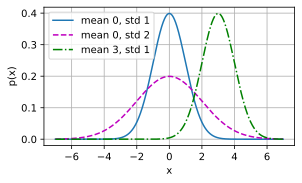

In [8]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
fc.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

#### 改变均值会产生沿轴的偏移，增加方差将会分散分布、降低其峰值
#### 均方损失可以用于线性回归的一个原因是
#### 噪声正态分布：$$ y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$
#### 其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$

#### 因为$\epsilon$满足正态分布，所以可以移项后得
#### 给定的$\chi $观测到特定的$y$似然（likelihood）：
#### $$ P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

#### 根据极大似然估计法，参数$\omega$和$b$的最优值是使整个数据集的极大似然值
#### $$ P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

#### 虽然许多指数函数的乘积最大化看似很难，但其实在不改变目标的前提下，用极大似然对数去简化
#### 由于历史原因，优化被说成最小化而不是最大化
#### 我们可以改为最小化负对数似然$-\log P(\mathbf y \mid \mathbf X)$
#### $$ -\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

#### 我们只需假设$\sigma$是某个固定常数就可以忽略第一项，因为第一项不依赖$w$和$b$
#### 现在第二项除了$\frac{1}{\sigma^2}$之外，其余的和均方误差是一样的
#### 上式不依赖$\sigma$，最小化均方误差等价于对线性模型的极大似然估计

### 3.1.4. 从线性回归到深度网络

#### 尽管我们只讨论了线性模型，但我们依然可以用神经网络的方式来描述它
#### 第一步就是用“层”符号来重写这个模型

### 3.1.4.1. 神经网络图

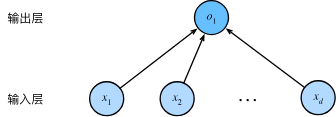

#### 如图，我们将线性回归模型描述为一个神经网络。
#### 该图只显示连接模式，即每个输出如何连接到输入，隐去了权重和偏置的值。
#### 输入为$x_1...x_d$，因此输入层中的输入数为d或称为特征维度（feature dimensionality）
#### 由于模型重点在计算上，所以我们计算层数时不考虑输入层，也就是说层数为1，是单层神经网络
#### 每个输入都与每个输出相连，我们将这种变换称为全连接层（fully‐connected layer）或称为稠密层（dense layer）

### 生物学

#### 线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。但是线性回归说是神经网络也合理。
#### 控制学家们开始开发人工神经元模型时，以线性模型为一个起点
#### 如图，轴突（axon，输出线）和轴突端子（axon terminal，输出端子）通过突触（synapse）与其他神经元连接

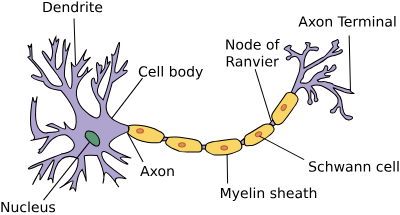

#### 树突中接收到来自其他神经元的信息$x_i$。该信息通过突触权重$w_i$来加权
#### 来自多个源的加权输入以加权和$ y = \sum_i x_i w_i + b $的形式聚集在细胞核中
#### 然后将这些信息发送到轴突$y$中处理

#### 当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感
#### 援引斯图尔特·罗素和彼得·诺维格在《Artificial Intelligence:A Modern Approach》中说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。 
#### 同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。

### 3.1.5. 小结

#### 机器学习模型中的关键要素是训练数据、损失算法、优化算法及模型本身
#### 矢量化简洁了表示，同时加快了速度
#### 最小化目标函数和极大似然估计等价
#### 线性回归模型也是一个神经网络模型哦😊
##### ps：如果损失函数是似然函数的对数函数，那么最小化目标函数和执行极大似然估计就等价

### 3.1.6 测试

#### test 1
##### 解析解是所有x的平均值
##### 满足正态分布时，结果还是平均值

#### test 2
##### 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置b（我们可以通过向X添加所有值为1的一列来做到这一点）。
1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
2. 计算损失对w的梯度。
3. 通过将梯度设为0、求解矩阵方程来找到解析解。
4. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

#### test 3
##### 3假定控制附加噪声ϵ的噪声模型是指数分布。也就是说，$p(ϵ) = \frac{1}{2} exp(−|\epsilon|)$
1. 写出模型$− log P(y | X)$下数据的负对数似然。
2. 请试着写出解析解。
3. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

## 3.2 线性回归的从零开始实现

#### 可以写代码来实现线性回归了，我们将从零开始，包括数据pipeline、模型、损失函数即mini-batch随机梯度下降器


In [9]:
import random
import torch

### 3.2.1 生成数据集

#### 简单起见，将根据带有噪声的线性模型构造一个人造数据集。
#### 我们的任务是使用这个有限样本的数据集来恢复这个模型的参数
#### 使用低维数据集，更容易可视化
#### 生成一个包含1000个样本的数据集，每个样本包含从标准正态分布中采样的2个特征 一个矩阵$X ∈ R ^{1000×2}$

#### 使用线性模型参数$ w = [2, −3.4]^⊤、b = 4.2 $和**噪声项**$\epsilon$生成数据集及其标签：
#### $y = Xw + b + ϵ.$


#### ϵ可以视为模型预测和标签时的潜在观测误差
#### 即ϵ服从均值为0的正态分布,我们将标准差设为0.01。

In [10]:
def synthetic_data(w, b, num_samples): #@save
    """生成y=Xw+b噪声"""
    X = torch.normal(0, 1, (num_samples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#### features中每一行都包含一个二维数据样本，labels中每一行包含一个label

In [11]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.7995, 1.2042]) 
label: tensor([1.6871])


#### 通过生成第二个特征features[:, 1]和labels散点图，可以看到直观的线性关系

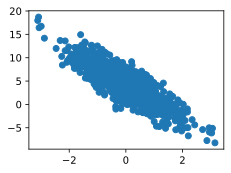

In [12]:
fc.set_figsize()
fc.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy())

### 3.2.2 读取数据集

#### 所以有必要定义一个函数，该函数能打乱数据集中的样本并以小批量方式获取数据

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 随机读取
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(batch_size+1, num_examples)])
        yield features[batch_indices], labels[batch_indices] # 保存结果

#### 通常，我们利用GPU并行运算的优势，处理合理大小的“小批量”
#### 每个样本和其损失函数的梯度都可以并行地进行模型计算

In [14]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-6.2454e-01, -3.5144e-04],
        [-1.3980e+00, -5.6726e-01],
        [-1.3339e+00, -1.8171e+00],
        [ 2.6171e-01, -3.6613e-01],
        [-2.0372e-01, -3.9361e-01],
        [ 6.0464e-01,  6.1383e-01],
        [-5.6685e-01, -1.4878e+00],
        [ 3.1958e-01, -9.5103e-02],
        [-1.4223e-01, -1.3666e+00],
        [ 1.5863e+00, -2.1365e-01],
        [ 2.9389e-01,  4.1210e-01]]) 
 tensor([[2.9358],
        [3.3163],
        [7.7109],
        [5.9672],
        [5.1511],
        [3.3164],
        [8.1319],
        [5.1907],
        [8.5765],
        [8.1035],
        [3.3740]])
